# Import

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Train and save model

In [21]:
n_samples = 300
xs = np.linspace(0, 30, n_samples, endpoint=False)
ys = xs + np.random.random(n_samples)*2 - 1

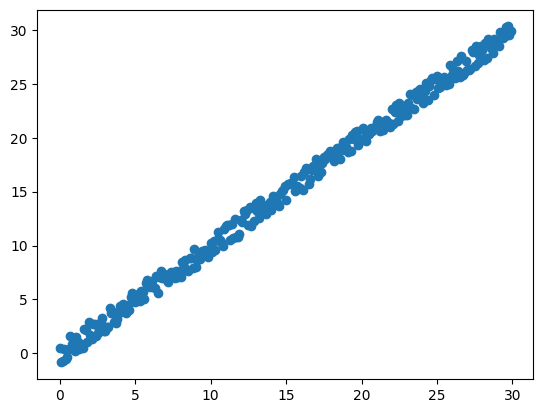

In [22]:
plt.scatter(xs, ys)
plt.show()

In [23]:
model = LinearRegression()
model.fit(xs.reshape(-1, 1), ys)

LinearRegression()

In [24]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Create and save datasets

In [34]:
!mkdir data

## df1

In [47]:
xs = np.linspace(30, 40, 100, endpoint=False)
ys = xs + np.random.random(100)*2 - 1

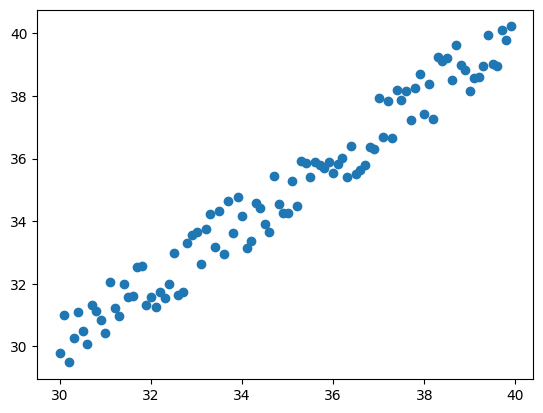

In [48]:
plt.scatter(xs, ys)
plt.show()

In [49]:
df = pd.DataFrame(columns = ['X', 'Y'])
df['X'] = xs
df['Y'] = ys
df.to_csv('data/df1.csv', index=False)

## df2

In [50]:
xs = np.linspace(40, 50, 100, endpoint=False)
ys = xs + np.random.random(100)*2 - 1

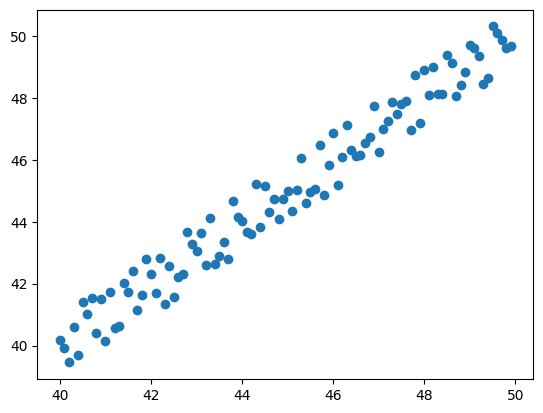

In [51]:
plt.scatter(xs, ys)
plt.show()

In [52]:
df = pd.DataFrame(columns = ['X', 'Y'])
df['X'] = xs
df['Y'] = ys
df.to_csv('data/df2.csv', index=False)

## df3

In [53]:
xs = np.linspace(50, 60, 100, endpoint=False)
ys = xs + np.random.random(100)*2 - 1
ys[30:50] *= 1.5

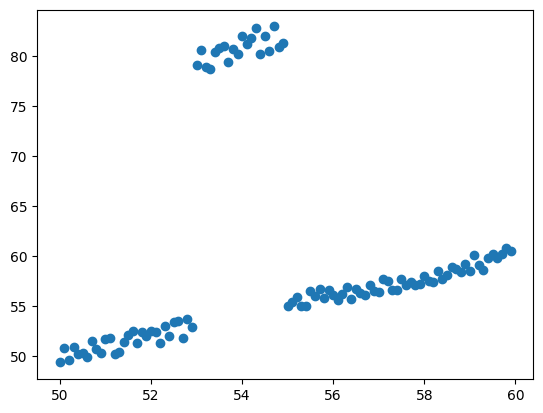

In [54]:
plt.scatter(xs, ys)
plt.show()

In [55]:
df = pd.DataFrame(columns = ['X', 'Y'])
df['X'] = xs
df['Y'] = ys
df.to_csv('data/df3.csv', index=False)

# Create python file for pytest

MAE can must be <= 2 because 0<=np.random.random<=1

In [122]:
%%writefile test.py

import pytest
import pandas as pd
import pickle

from pathlib import Path
from sklearn.metrics import mean_squared_error, mean_absolute_error


@pytest.fixture(scope='function')
def load_data(request):
    return pd.read_csv(f'data/df{request.param}.csv')


@pytest.fixture()
def load_model():
    with open('model.pkl', 'rb') as file:
        model = pickle.load(file)

    return model


def get_mae(df, model):
    y_pred = model.predict(df['X'].values.reshape(-1, 1))

    return mean_absolute_error(df['Y'].values, y_pred)


@pytest.mark.parametrize('load_data', ['1'], indirect=True)
def test1(load_data, load_model):
    df = load_data
    model = load_model

    assert get_mae(df, model) <= 2


@pytest.mark.parametrize('load_data', ['2'], indirect=True)
def test2(load_data, load_model):
    df = load_data
    model = load_model

    assert get_mae(df, model) <= 2


@pytest.mark.parametrize('load_data', ['3'], indirect=True)
def test3(load_data, load_model):
    df = load_data
    model = load_model

    assert get_mae(df, model) <= 2


Overwriting test.py


# Tests

In [123]:
!pytest -v test.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.4.1, pluggy-1.3.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 3 items                                                              

test.py::test1[1] PASSED                                                 [ 33%]
test.py::test2[2] PASSED                                                 [ 66%]
test.py::test3[3] FAILED                                                 [100%]

=================================== FAILURES ===================================
___________________________________ test3[3] ___________________________________

load_data =        X          Y
0   50.0  49.364363
1   50.1  50.779841
2   50.2  49.594246
3   50.3  50.946803
4   50.4  50.21702...59.5  60.241271
96  59.6  59.799397
97  59.7  60.175184
98  59.8  60.772926
99  59.9  60.553147

[100 rows x 2 columns]
load_model = LinearRegression()

    